## TP5
Para una imagen de su elección
1. Construir un espacio de características basado en color
2. Construir un espacio de características basado en color y posición
Ejemplo 𝑋=(𝑅,𝐺,𝐵,𝑥,𝑦)(pueden experimentar con otros espacios de
color o usar escala de grises)
3. Graficar la distribución de características para ambos espacios
4. Obtener la imagen posterizada y las mascaras correspondientes a cada
clase, utilizando k means con asignación aleatoria de centroides, para
ambos espacios de características
5. Comparar todos los resultados obtenidos

In [108]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

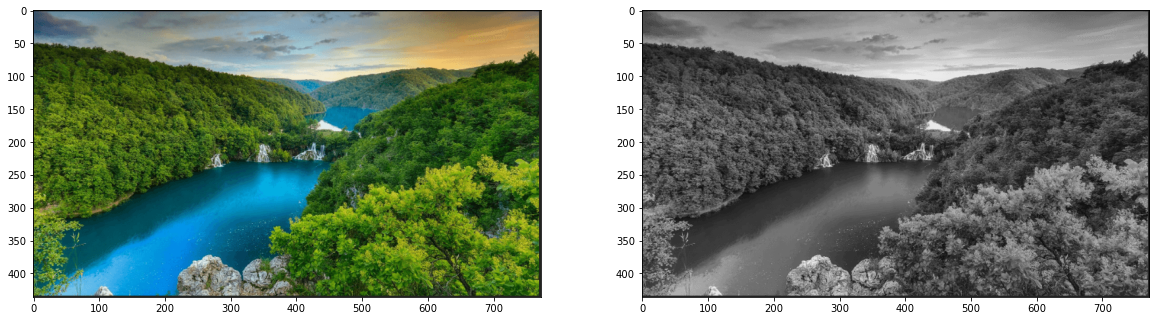

In [154]:
img = cv.imread('demo_image.png')
cielab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2,figsize=(20,7))
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2); plt.imshow(gray, cmap = 'gray', vmin=0, vmax=255)


In [156]:
# caracteristicas color
features_intensidad = np.float32(gray.reshape((-1,1)))

# caracteristicas color + posicion
features_intensidad_position = []
for x in np.arange(gray.shape[0]):
    for y in np.arange(gray.shape[1]):
        features_intensidad_position.append([gray[x,y], x, y])

features_intensidad_position = np.float32(np.array(features_intensidad_position))


Distribucion en el espacio de caracteristicas (espacio Intensidad)


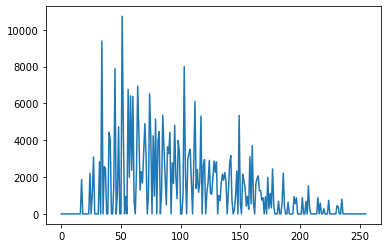

In [157]:
print("Distribucion en el espacio de caracteristicas (espacio Intensidad)")
hist,bins = np.histogram(features_intensidad.ravel(),256,[0,256])
plt.plot(hist)

Distribucion en el espacio de caracteristicas (espacio intensidad+posicion)


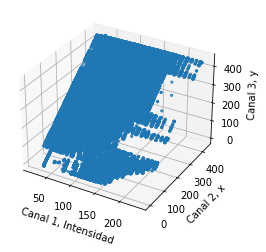

In [158]:
print("Distribucion en el espacio de caracteristicas (espacio intensidad+posicion)")

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")


axis.scatter(features_intensidad_position[:,0],features_intensidad_position[:,1], features_intensidad_position[:,1], marker=".")
axis.set_xlabel("Canal 1, Intensidad")
axis.set_ylabel("Canal 2, x")
axis.set_zlabel("Canal 3, y")
plt.show()

In [174]:
# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 4

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 10 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact, label, color_clusters = cv.kmeans(features_intensidad, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')

Centroides: 
 [[ 80]
 [ 45]
 [120]
 [171]] 



Imagen posterizada (espacio color)


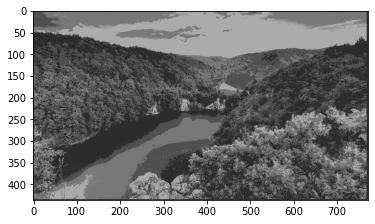

In [175]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde. Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((gray.shape))

# Mostramos la imagen compuesta
print('Imagen posterizada (espacio color)')
plt.imshow(img_out, cmap = 'gray', vmin=0, vmax=255)


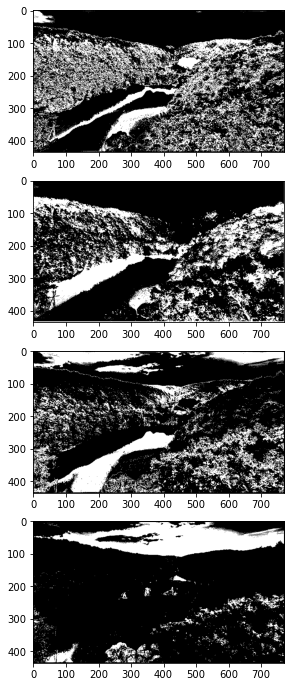

In [177]:
mask_list = list()
for cluster in color_clusters:
    mask = np.zeros(img_out.shape,'uint8')
    mask[np.where(img_out == cluster)] = 255
    mask_list.append(mask)

fig, axs = plt.subplots(4, 1,figsize=(7,12))

for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(gray, gray, mask = mask)
    plt.subplot(4,1,i+1); plt.imshow(mask,  cmap = 'gray', vmin=0, vmax=255)


In [171]:
# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 4

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 10 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact, label, color_clusters = cv.kmeans(features_intensidad_position, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')

Centroides: 
 [[ 86  54  93]
 [ 88 192 128]
 [ 81  25 138]
 [135  81   3]] 



Imagen posterizada (espacio color +  posicion)


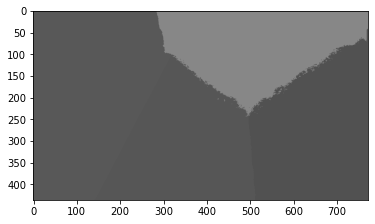

In [172]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde. Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[:, 0][label.flatten()]
img_out = img_out.reshape((gray.shape))

# Mostramos la imagen compuesta
print('Imagen posterizada (espacio color +  posicion)')
plt.imshow(img_out, cmap = 'gray', vmin=0, vmax=255)


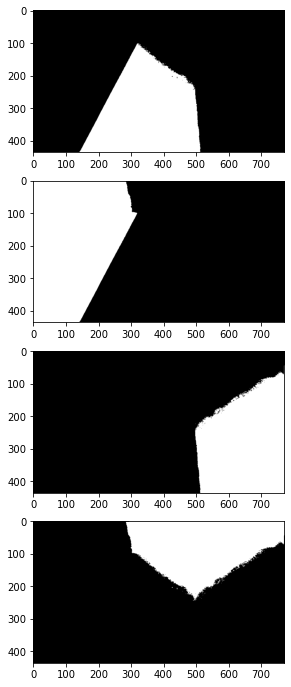

In [173]:
mask_list = list()
for cluster in color_clusters[:, 0]:
    mask = np.zeros(img_out.shape,'uint8')
    mask[np.where(img_out == cluster)] = 255
    mask_list.append(mask)

fig, axs = plt.subplots(4, 1,figsize=(7,12))

for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(gray, gray, mask = mask)
    plt.subplot(4,1,i+1); plt.imshow(mask,  cmap = 'gray', vmin=0, vmax=255)

### Conclusion:

* No se logra una mejora considerando la posicion del pixel para esta imagen, se observa fronteras lineales posiblemente debido a la inclusion de la posicion del pixel en el clustering.
